In [ ]:
# Josh Gilkinson
# DS630 Week 1

In [1]:
import pandas as pd
import sqlite3

PB1_path = r'C:\Users\jgilk\OneDrive\Desktop\Data Science\DSC540\PB_Data1.csv'
PB2_path = r'C:\Users\jgilk\OneDrive\Desktop\Data Science\DSC540\PB_Data2.csv'

# First
df_PB1 = pd.read_csv(PB1_path, delimiter='\t', usecols=["Spring_year", "Latitude", "Longitude"])
df_PB1.rename(columns={"Spring_year": "Year Discovered"}, inplace=True)

# Second
df_PB2 = pd.read_csv(PB2_path, delimiter='\t', usecols=["ObservationDateTime", "Latitude", "Longitude"])
df_PB2.rename(columns={"ObservationDateTime": "Year Discovered"}, inplace=True)

# Perform the merge operation on the year columns
df_merged = pd.merge(df_PB1, df_PB2, on=["Year Discovered", "Latitude", "Longitude"], suffixes=('_PB1', '_PB2'))

print(df_merged.head())

   Year Discovered  Latitude  Longitude
0             1910   70.0833  -149.1667
1             1910   70.8333  -152.2500
2             1913   70.1667  -147.3333
3             1988   65.8000  -167.7000
4             1917   70.2000  -150.8333


In [2]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('merged_data.db')

# Upload the DataFrame to SQLite
df_merged.to_sql('merged_table', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print("Data uploaded to SQLite successfully.")


Data uploaded to SQLite successfully.


In [3]:
import requests
import datetime
import time
import pandas as pd
import sqlite3

API_KEY = '2881d8cc77da137fccc2aeb88c2e59d4'
BASE_URL_WEATHER = 'http://api.openweathermap.org/data/2.5/weather'

def fetch_weather_data(lat, lon, date):
    params = {
        'lat': lat,
        'lon': lon,
        'appid': API_KEY,
        'units': 'metric',  
    }
    try:
        print(f"Making API call for {date} at lat {lat}, lon {lon}...")
        response = requests.get(BASE_URL_WEATHER, params=params)
        time.sleep(1.5)  # Had to add delay after getting a warning email 
        
        if response.status_code == 200:
            print(f"Data fetched successfully for {date}.")
            return response.json()
        elif response.status_code == 429:
            print(f"Rate limit exceeded. Waiting before retrying...")
            time.sleep(60)  # Wait for 60 seconds before retrying
            return fetch_weather_data(lat, lon, date) 
        else:
            print(f"Error fetching data for {date}: {response.status_code}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return None

def calculate_yearly_avg(lat, lon, year):
    # Since the free version won't let me access yearly avgs I am using a represenative date of
    # April 1st since the polar bear mating season typically runs between March through May
    year = int(year)  # Change the year to an int or it fails
    representative_date = datetime.date(year, 4, 1)
    print(f"Fetching weather data for {representative_date} at lat {lat}, lon {lon}...")
    weather_data = fetch_weather_data(lat, lon, representative_date)
    
    if weather_data:
        yearly_avg_temp = weather_data['main']['temp']
        print(f"Estimated average temperature for {year} at lat {lat}, lon {lon}: {yearly_avg_temp}°C")
        return yearly_avg_temp
    else:
        print(f"No data available for {representative_date} at lat {lat}, lon {lon}.")
        return None

PB1_path = r'C:\Users\jgilk\OneDrive\Desktop\Data Science\DSC540\PB_Data1.csv'
PB2_path = r'C:\Users\jgilk\OneDrive\Desktop\Data Science\DSC540\PB_Data2.csv'

df_PB1 = pd.read_csv(PB1_path, delimiter='\t', usecols=["Spring_year", "Latitude", "Longitude"])
df_PB1.rename(columns={"Spring_year": "Year Discovered"}, inplace=True)

df_PB2 = pd.read_csv(PB2_path, delimiter='\t', usecols=["ObservationDateTime", "Latitude", "Longitude"])
df_PB2.rename(columns={"ObservationDateTime": "Year Discovered"}, inplace=True)

# Convert 'Year Discovered' to integer in both DataFrames to avoid float interpretation issues
df_PB1['Year Discovered'] = df_PB1['Year Discovered'].astype(int)
df_PB2['Year Discovered'] = df_PB2['Year Discovered'].astype(int)

# Merge the DataFrames
df_merged = pd.merge(df_PB1, df_PB2, on=["Year Discovered", "Latitude", "Longitude"], suffixes=('_PB1', '_PB2'))

df_merged['Yearly Avg Temp'] = df_merged.apply(
    lambda row: calculate_yearly_avg(row['Latitude'], row['Longitude'], row['Year Discovered']), axis=1
)

print(df_merged.head())

conn = sqlite3.connect('merged_data_with_temps.db')

df_merged.to_sql('merged_table_with_temps', conn, if_exists='replace', index=False)

conn.close()

print("Data with yearly average temperatures uploaded to SQLite successfully.")


Fetching weather data for 1910-04-01 at lat 70.0833, lon -149.1667...
Making API call for 1910-04-01 at lat 70.0833, lon -149.1667...
Data fetched successfully for 1910-04-01.
Estimated average temperature for 1910 at lat 70.0833, lon -149.1667: -22.09°C
Fetching weather data for 1910-04-01 at lat 70.8333, lon -152.25...
Making API call for 1910-04-01 at lat 70.8333, lon -152.25...
Data fetched successfully for 1910-04-01.
Estimated average temperature for 1910 at lat 70.8333, lon -152.25: -20.14°C
Fetching weather data for 1913-04-01 at lat 70.1667, lon -147.3333...
Making API call for 1913-04-01 at lat 70.1667, lon -147.3333...
Data fetched successfully for 1913-04-01.
Estimated average temperature for 1913 at lat 70.1667, lon -147.3333: -21.16°C
Fetching weather data for 1988-04-01 at lat 65.8, lon -167.7...
Making API call for 1988-04-01 at lat 65.8, lon -167.7...
Data fetched successfully for 1988-04-01.
Estimated average temperature for 1988 at lat 65.8, lon -167.7: -8.35°C
Fetch

In [8]:
import pandas as pd
import sqlite3

Carbon_path = 'Carbon.csv'

conn = sqlite3.connect('Carbon.db')

df_carbon = pd.read_csv(Carbon_path)

print(df_carbon.head())

df_carbon.to_sql('carbon_table', conn, if_exists='replace', index=False)

conn.close()

print("CSV data has been uploaded successfully.")


   Year   CO2 Emissions Emission Change
0  2022  38,521,997,860           1.15%
1  2021  38,082,163,770           5.95%
2  2020  35,944,470,190          -4.97%
3  2019  37,824,905,990          -0.02%
4  2018  37,831,867,370           2.55%
CSV data has been uploaded successfully.


In [9]:
#Merging the DBs together

In [10]:
import pandas as pd
import sqlite3

# Paths
db_paths = {
    'merged_table': 'merged_data.db',
    'merged_data_with_temps': 'merged_data_with_temps.db',
    'carbon': 'Carbon.db'
}

dfs = {}
for name, path in db_paths.items():
    conn = sqlite3.connect(path)
    # Get table names
    table_names = conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
    table_names = [name[0] for name in table_names]
    
    # Load all tables into a dictionary of DataFrames
    for table_name in table_names:
        dfs[f"{name}_{table_name}"] = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
    
    conn.close()

# Save
output_db_path = 'Ultimate_Merged_Data.db'
conn = sqlite3.connect(output_db_path)

for name, df in dfs.items():
    df.to_sql(name, conn, if_exists='replace', index=False)

df_merged.to_sql('merged_data', conn, if_exists='replace', index=False)

conn.close()

print("Databases merged and saved as Ultimate_Merged_Data.db.")


Databases merged and saved as Ultimate_Merged_Data.db.


In [11]:
# I wanted to have a designated place with all the table names
import sqlite3

conn = sqlite3.connect('Ultimate_Merged_Data.db')

cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

tables = cursor.fetchall()

print("Tables in the database:")
for table_name in tables:
    print(table_name[0])

conn.close()


Tables in the database:
merged_data_merged_table
merged_table_merged_table
merged_data_with_temps_merged_table_with_temps
carbon_carbon_table
merged_data


In [12]:
#Visualization 1: Line chart for CO2 Emissions

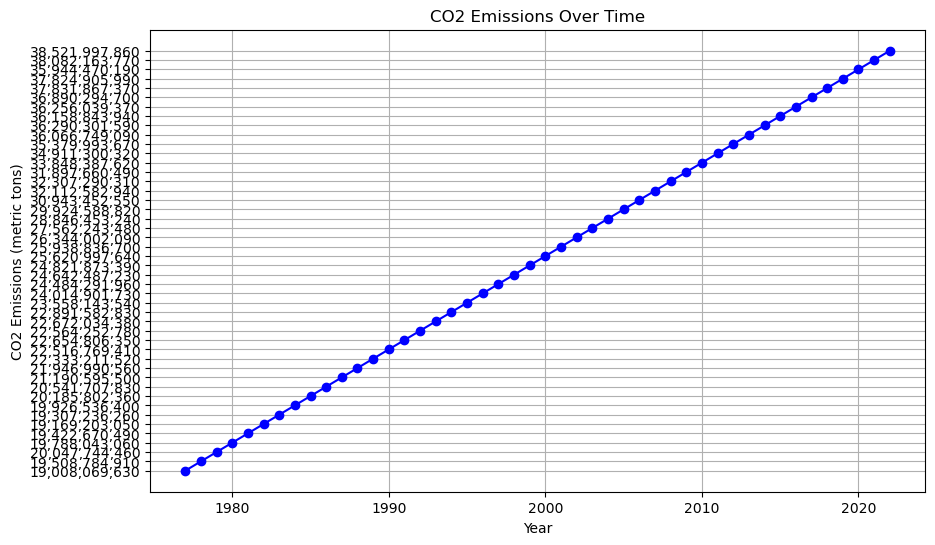

In [13]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('Ultimate_Merged_Data.db')

df_carbon = pd.read_sql_query("SELECT * FROM carbon_carbon_table", conn)

conn.close()

# Ensure the 'Year' column is treated as integers
df_carbon['Year'] = df_carbon['Year'].astype(int)

plt.figure(figsize=(10, 6)) 
plt.plot(df_carbon['Year'], df_carbon['CO2 Emissions'], marker='o', linestyle='-', color='b')

# Had to invert y axis, otherwise it looked like CO2 emissions were dropping 
plt.gca().invert_yaxis()

plt.title('CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tons)')
plt.grid(True)  

plt.show()


In [14]:
#Visualization 2: Polar Bear Den Locations vs Time

In [15]:
import pandas as pd
import sqlite3
import folium
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

conn = sqlite3.connect('Ultimate_Merged_Data.db')

df_merged = pd.read_sql_query("SELECT * FROM merged_table_merged_table", conn)

conn.close()

print(df_merged.head())

min_year = df_merged['Year Discovered'].min()
max_year = df_merged['Year Discovered'].max()

def normalize_year(year):
    """Normalize the year to a range between 0 and 1."""
    return (year - min_year) / (max_year - min_year)

# Create a color map from blue to red
cmap = plt.get_cmap('coolwarm') 
norm = mcolors.Normalize(vmin=0, vmax=1)

def get_color(normalized_value):
    """Get a color from the colormap based on the normalized value."""
    return mcolors.to_hex(cmap(norm(normalized_value)))

average_lat = df_merged['Latitude'].mean()
average_lon = df_merged['Longitude'].mean()

denmap = folium.Map(location=[average_lat, average_lon], zoom_start=6)

for index, row in df_merged.iterrows():
    normalized_year = normalize_year(row['Year Discovered'])
    color = get_color(normalized_year)
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=8, 
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Year: {row['Year Discovered']}"
    ).add_to(denmap)


# Display the map
denmap


   Year Discovered  Latitude  Longitude
0             1910   70.0833  -149.1667
1             1910   70.8333  -152.2500
2             1913   70.1667  -147.3333
3             1988   65.8000  -167.7000
4             1917   70.2000  -150.8333


In [16]:
#Visualization 3: Temps over time

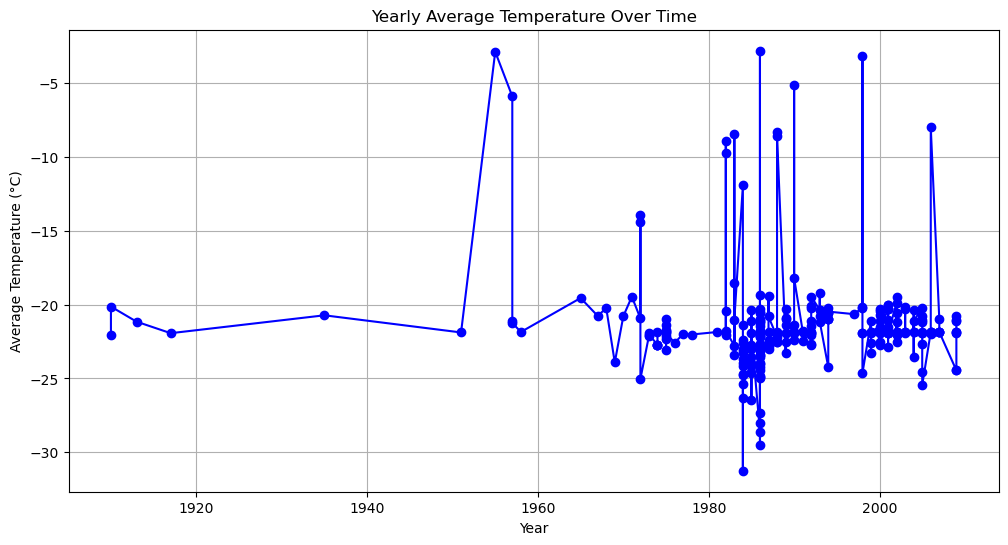

In [17]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('merged_data_with_temps.db')

query = "SELECT [Year Discovered] AS Year, [Yearly Avg Temp] FROM merged_table_with_temps"
df = pd.read_sql_query(query, conn)

conn.close()

df = df.sort_values(by='Year') 

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Yearly Avg Temp'], marker='o', linestyle='-', color='b')
plt.title('Yearly Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)

plt.show()



In [18]:
#Visualization 4: Avg temps vs Co2 Emissions

In [ ]:
# Visualization 5: Heatmap showing the polar bear den locations verses the annual temp avgs.

In [61]:
import pandas as pd
import sqlite3
import folium
from folium.plugins import HeatMap
from IPython.display import display


conn = sqlite3.connect('Ultimate_Merged_Data.db')

query_temp = "SELECT [Latitude], [Longitude], [Year Discovered], [Yearly Avg Temp] FROM merged_data_with_temps_merged_table_with_temps"
df_temps = pd.read_sql_query(query_temp, conn)

conn.close()

# Base Map
map_center = [df_temps['Latitude'].mean(), df_temps['Longitude'].mean()]
bearmap = folium.Map(location=map_center, zoom_start=5)

# Create Heatmap
heat_data = [[row['Latitude'], row['Longitude'], row['Yearly Avg Temp']] for index, row in df_temps.iterrows()]

# Add HeatMap layer
HeatMap(heat_data, radius=10, max_zoom=13).add_to(bearmap)

# Legend Data
legend_html = """
    <div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 150px; height: auto;
    border:2px solid grey; background-color:white;
    z-index:9999; font-size:14px;
    ">
    <b>Temperature (°C)</b><br>
    <i style="background:blue; opacity:0.7; width:20px; height:20px; display:inline-block;"></i> Low<br>
    <i style="background:green; opacity:0.7; width:20px; height:20px; display:inline-block;"></i> Moderate<br>
    <i style="background:red; opacity:0.7; width:20px; height:20px; display:inline-block;"></i> High<br>
    </div>
    """

# Add the legend to the map
bearmap.get_root().html.add_child(folium.Element(legend_html))

display(bearmap)


In [ ]:
#Visualization 6: Histogram

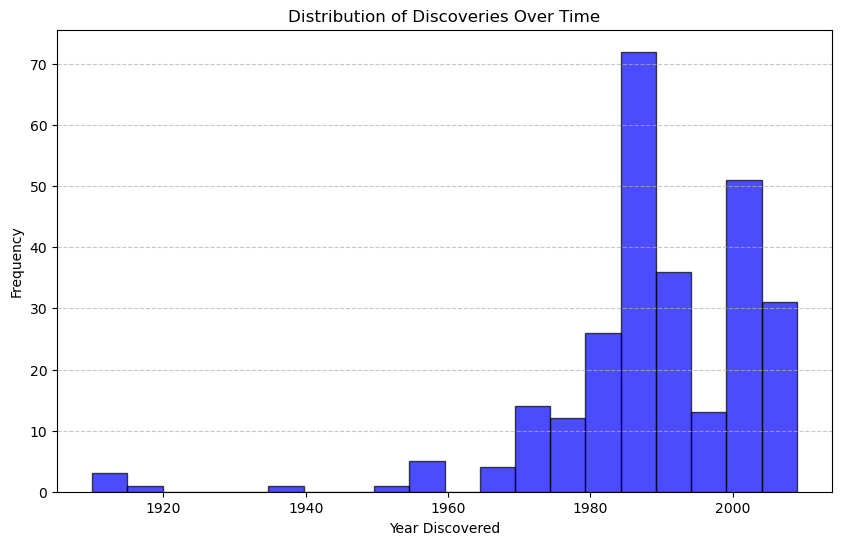

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

PB1_path = r'C:\Users\jgilk\OneDrive\Desktop\Data Science\DSC540\PB_Data1.csv'
PB2_path = r'C:\Users\jgilk\OneDrive\Desktop\Data Science\DSC540\PB_Data2.csv'

df_PB1 = pd.read_csv(PB1_path, delimiter='\t', usecols=["Spring_year", "Latitude", "Longitude"])
df_PB1.rename(columns={"Spring_year": "Year Discovered"}, inplace=True)

df_PB2 = pd.read_csv(PB2_path, delimiter='\t', usecols=["ObservationDateTime", "Latitude", "Longitude"])
df_PB2.rename(columns={"ObservationDateTime": "Year Discovered"}, inplace=True)

df_merged = pd.merge(df_PB1, df_PB2, on=["Year Discovered", "Latitude", "Longitude"], suffixes=('_PB1', '_PB2'))

plt.figure(figsize=(10, 6))
plt.hist(df_merged['Year Discovered'], bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Discoveries Over Time')
plt.xlabel('Year Discovered')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
#Visualization 7: Box Plot

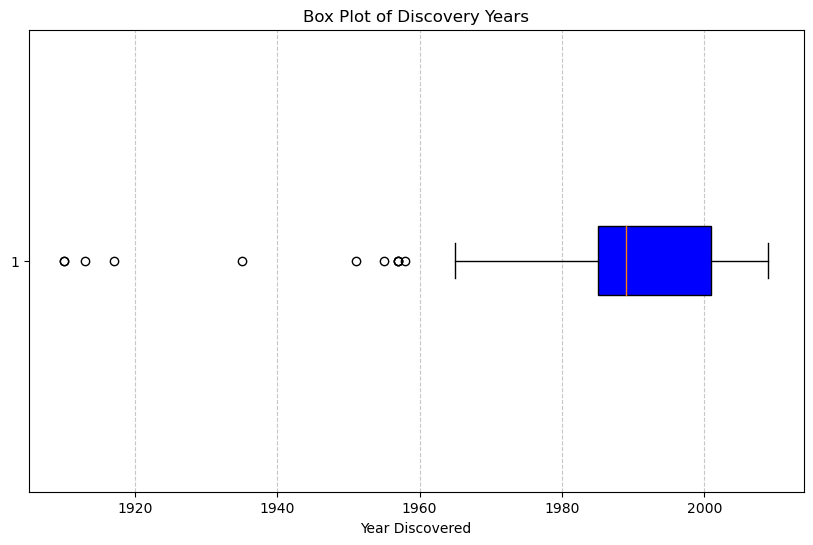

In [24]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_merged['Year Discovered'], vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))

plt.title('Box Plot of Discovery Years')
plt.xlabel('Year Discovered')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
# Write Up

In [70]:
# Starting this project, I anticipated that it would be relatively straightforward—essentially a matter of comparing 
# spreadsheets and mapping the results. However, merging the datasets into a single database proved to be far more complex
# than I initially expected. The process involved navigating various technical challenges and ensuring data consistency 
# across different sources, which added layers of complexity to the task .

In [ ]:
# Results

In [ ]:
# I believe I have proven my hypothesis based on the den location vs. time heatmap. A trend is clearly shown where the 
# dens are moving away from the ice flows and closer to the mainland. This can be interpreted as a structural insecurity 
# of the ice caused by global warming. However, this cannot be stated with 100% certainty and could be considered a case 
# of causation vs. correlation. Additionally, the small sample size and limited geographic data could also be factors in 
# this outcome.

In [ ]:
#SOURCES: You should be able to copy/ paste these into a browser to access.

In [ ]:
https://bellevueuniversity-my.sharepoint.com/:x:/r/personal/jmgilkinson_my365_bellevue_edu/_layouts/15/Doc.aspx?sourcedoc=%7B94CF06BC-1CAA-4C76-8AEC-69C98C2E1789%7D&file=PB%20Data1.xlsx&action=default&mobileredirect=true

In [ ]:
https://bellevueuniversity-my.sharepoint.com/:x:/r/personal/jmgilkinson_my365_bellevue_edu/_layouts/15/Doc.aspx?sourcedoc=%7B6766A2CB-6F7D-4136-A4E0-40580BC81301%7D&file=PB_Data2.csv&action=default&mobileredirect=true&ct=1733694568036&wdOrigin=OFFICECOM-WEB.START.UPLOAD&cid=d941cee8-3e50-4a1d-8163-999f9f350cb9&wdPreviousSessionSrc=HarmonyWeb&wdPreviousSession=4200fd11-9630-4d71-a0b1-b1af61f21eec